In [38]:
# Imports
!pip install preliz

import preliz as pz
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
import pymc as pm
import pandas as pd


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


<Axes: >

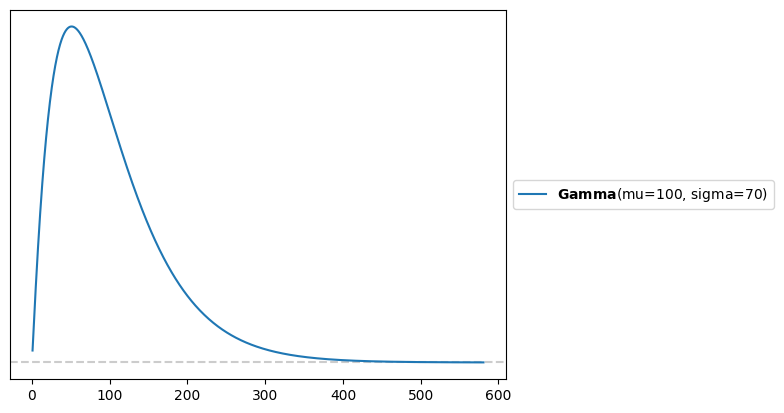

In [39]:
# 67% were <256, but only 30% were <64
# This is about what I expect the likelihood to look like, informing my priors for mu and sigma
pz.Gamma(mu=100, sigma=70).plot_pdf()

<Axes: >

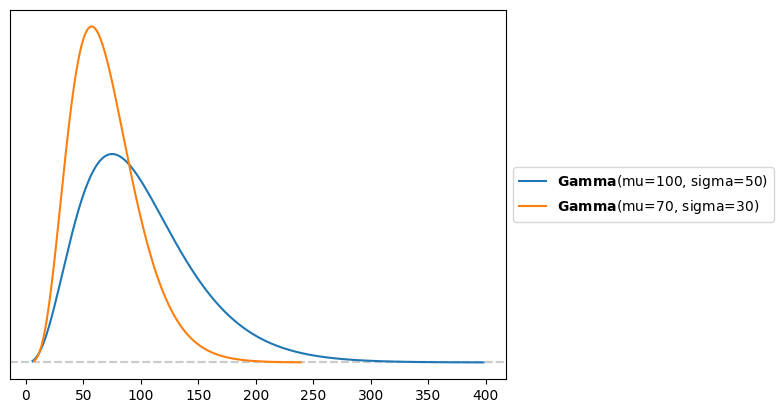

In [40]:
# Visualize priors
pz.Gamma(mu=100, sigma=50).plot_pdf()
pz.Gamma(mu=70, sigma=30).plot_pdf()

(array([ 259., 1781., 1362.,  553.,  455.,  390.,  314.,  358.,  316.,
         309.,  293.,  250.,  243.,  206.,  211.,  207.,  174.,  190.,
         183.,  170.,  152.,  130.,  121.,  133.,  119.,   99.,   98.,
          89.,   86.,   55.,   72.,   70.,   52.,   51.,   58.,   53.,
          33.,   35.,   26.,   25.,   29.,   23.,   18.,   20.,   22.,
          16.,   13.,   13.,    8.,    6.]),
 array([   0.,   25.,   50.,   75.,  100.,  125.,  150.,  175.,  200.,
         225.,  250.,  275.,  300.,  325.,  350.,  375.,  400.,  425.,
         450.,  475.,  500.,  525.,  550.,  575.,  600.,  625.,  650.,
         675.,  700.,  725.,  750.,  775.,  800.,  825.,  850.,  875.,
         900.,  925.,  950.,  975., 1000., 1025., 1050., 1075., 1100.,
        1125., 1150., 1175., 1200., 1225., 1250.]),
 <BarContainer object of 50 artists>)

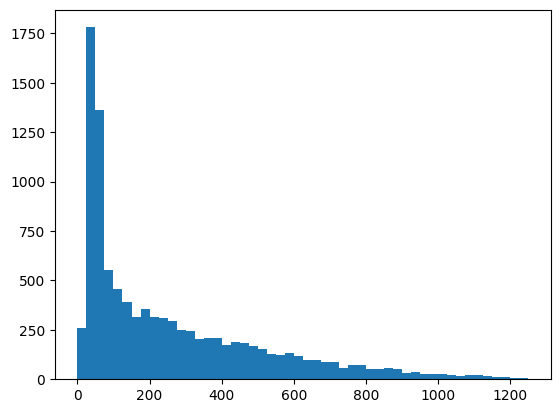

In [52]:
# Load the data, and plot a histogram to visualize it
with open("seeds.csv") as seeds:
    data = np.array([f if f != 0 else 0.0000001 for f in [float(f) for f in seeds.read().split(",")]])

plt.hist(data, bins=50, range=(0, 1250))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


array([<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'sigma'}>],
      dtype=object)

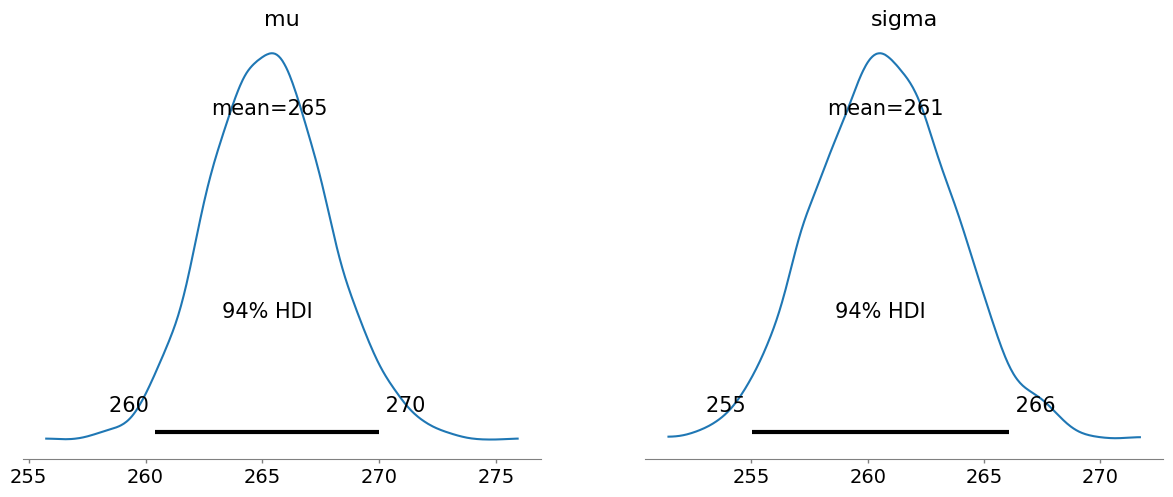

In [42]:
with pm.Model() as model:
    mu = pm.Gamma('mu', mu=100, sigma=50)
    sigma = pm.Gamma('sigma', mu=70, sigma=30)
    y = pm.Gamma('y', mu=mu, sigma=sigma, observed=data)

    post = pm.sample(1000)

az.plot_posterior(post)

<Axes: >

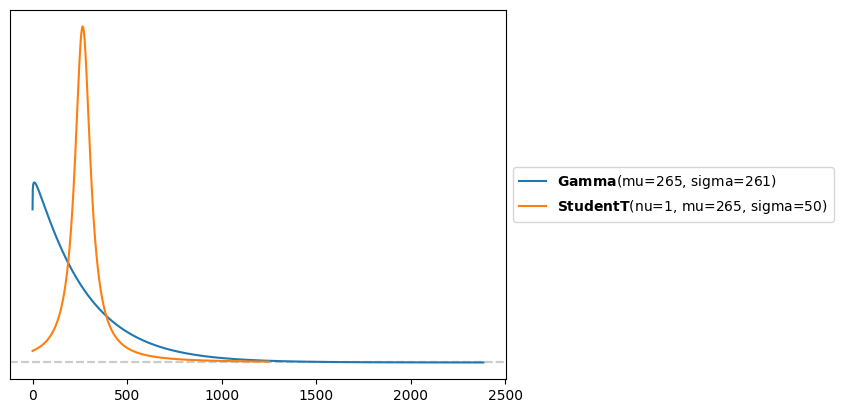

In [67]:
pz.Gamma(mu=265.3, sigma=260.7).plot_pdf()
pz.StudentT(mu=265.3, sigma=50, nu=1).plot_pdf(support=(0, 1250))


Sampling: [y]


Output()

Near an ocean: 2604122.866365812/10000


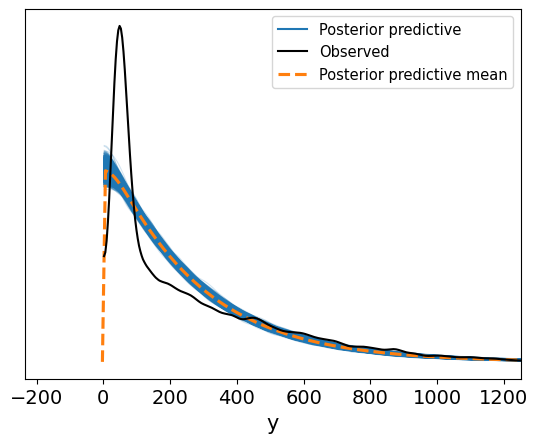

In [61]:
pm.sample_posterior_predictive(post, model=model, extend_inferencedata=True)

az.plot_ppc(post).set_xbound(upper=1250)
vals = az.extract(post, group="posterior_predictive").sel(sample=0).sel(draw=0).y.to_series().values

print(f"Near an ocean: {np.sum(vals)}/10000")